In [1]:
import sys
sys.path.append('/Users/kai/src/psc/python')

In [2]:
import logging
#logging.basicConfig(level=logging.DEBUG)

from psc import adios2py

with adios2py.file('/Users/kai/src/psc/build-mac/pfd.000000000.bp') as file:
    pass

file = adios2py.file('/Users/kai/src/psc/build-mac/pfd.000000000.bp')
var = file['jeh']
logging.debug(var)
print(var._name())
file.close()
logging.debug(var)
logging.debug("done")
#print(var._name())

jeh


In [3]:
file = adios2py.file('/Users/kai/src/psc/build-mac/pfd.000000000.bp')
del file

In [4]:
import h5py

file = h5py.File("../build/gauss.000000_p000000.h5")
d = file["dive-uid-0x7fbcf6f29fd0/dive/p0/3d"]
print(type(d), d.shape, d.dtype)
print(d)
file.close()
print(type(d), d.shape, d.dtype)
print(d)
#d[:]

<class 'h5py._hl.dataset.Dataset'> (240, 80, 1) float32
<HDF5 dataset "3d": shape (240, 80, 1), type "<f4">
<class 'h5py._hl.dataset.Dataset'> (240, 80, 1) float32
<Closed HDF5 dataset>


# outdated already...

In [5]:
import sys
sys.path.append('/Users/kai/src/psc/python')
import psc
import psc.run

import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 3]

In [6]:
def read(run, time):
    py_e = run.read('py_he_e', [0, 0, 0], run.psc.gdims)
    n_e = -run.read('rho_he_e', [0, 0, 0], run.psc.gdims)
    return {"n_e" : n_e, "py_e" : py_e}

def plot(run, time):
    ds = read(run, time)
    n_e, py_e = ds["n_e"], ds["py_e"]
    uy = py_e/n_e
    fig, axes = plt.subplots(1, 2)
    uy.plot(x='y',y='z', robust=True, ax=axes[0])
    n_e.plot(x='y', y='z', robust=True, ax=axes[1])

reading  all_1st [0 0 0 5] [  1  80 240   1]
reading  all_1st [0 0 0 0] [  1  80 240   1]


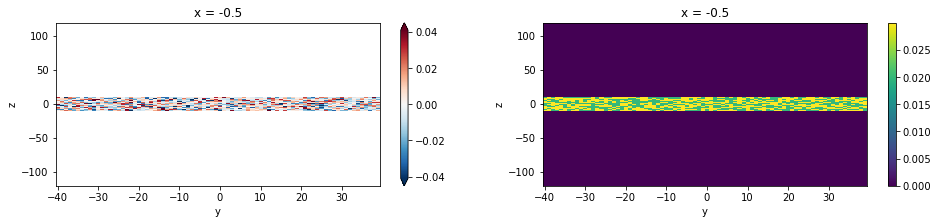

In [7]:
root = '/Users/kai/src/psc/build-mac'
run = psc.run.Run(root, [1., 80., 240.])

plot(run, 0)

reading  all_1st [0 0 0 5] [  1  80 240   1]
reading  all_1st [0 0 0 0] [  1  80 240   1]


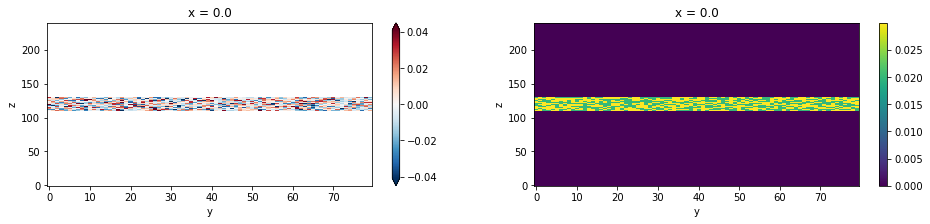

In [8]:
root = '/Users/kai/src/psc/build-mac'
run = psc.run.Run(root)

plot(run, 0)